# Data : Iris 데이터 

## x축 sepal length, y축 petal length, target별로 시각화하세요.

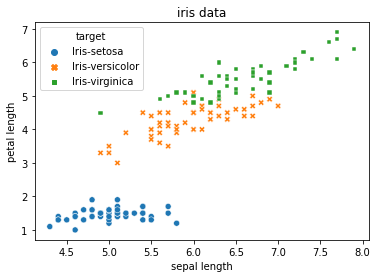

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_iris = pd.read_csv('../../data/iris.csv')

plt.title('iris data')
sns.scatterplot(x='sepal length', y='petal length', data=df_iris, hue='target', style='target')
plt.show()


# Data :  Cars93 데이터 
## X축 : RPM, Y축 Price 산점도 그리기 
## X축 Passengers, Y축 Price, 꺾은선 그래프 그리기 
## Price, RPM 변수 Boxplot 그리기 

In [7]:
df_car = pd.read_csv('../../data/Cars93.csv')
df_car

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,Front,...,7,187,115,72,38,34.0,-2147483648,3960,non-USA,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,Front,...,5,180,103,67,35,31.5,14,2985,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,Front,...,4,159,97,66,36,26.0,15,2810,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,Rear,...,5,190,104,67,37,29.5,14,2985,non-USA,Volvo 240


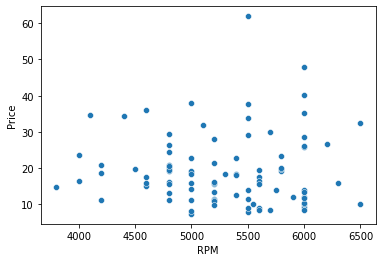

In [8]:
## X축 : RPM, Y축 Price 산점도 그리기 

sns.scatterplot(x='RPM', y='Price', data=df_car)
plt.show()

In [12]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

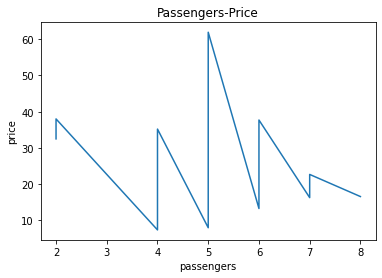

In [20]:
## X축 Passengers, Y축 Price, 꺾은선 그래프 그리기 
df_car_sort = df_car.sort_values(by=['Passengers','Price'])
plt.plot(df_car_sort['Passengers'], df_car_sort['Price'])
plt.xlabel('passengers')
plt.ylabel('price')
plt.title('Passengers-Price')
plt.show()

In [23]:
df_car['Price']

0     15.9
1     33.9
2     29.1
3     37.7
4     30.0
      ... 
88    19.7
89    20.0
90    23.3
91    22.7
92    26.7
Name: Price, Length: 93, dtype: float64

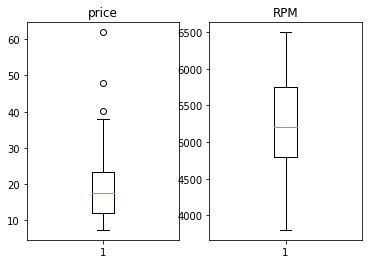

In [38]:
# Price, RPM 변수 Boxplot 그리기 

plt.subplot(1,2,1)
plt.boxplot(df_car['Price'])
plt.title('price')

plt.subplot(1,2,2)
plt.boxplot(df_car['RPM'])
plt.title('RPM')

plt.show()

In [39]:
def detect_outliers(df=None, column=None, weight=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    IQR_weight = IQR*weight
    
    outlier_idx = df[(df[column] < Q1 - IQR_weight)|(df[column] > Q3 + IQR_weight)].index
    
    return outlier_idx

price_outliers = df_car['Price'].loc[detect_outliers(df_car,'Price')]
print(price_outliers)


10    40.1
47    47.9
58    61.9
Name: Price, dtype: float64
